# Solo Chess - Data Analysis

In [1]:
## Imports
import numpy as np
import pandas as pd
import statsmodels
import statistics
import matplotlib.pyplot as plt
import re
import functools as ft
from scipy import stats

## Colors used in graphs, for consistency
color_dict = {'bt_random': 'C0', 'bt_rank' : 'C1', 'bt_attack':'C2', 'bt_center':'C3'}

C:\Users\sverl\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


### Loading Data

In [2]:
## Load .csv files
char = pd.read_csv('typedist.csv')
rand = pd.read_csv('random.csv')
rank = pd.read_csv('rank.csv')
attack = pd.read_csv('attack.csv')
center = pd.read_csv('center.csv')

## Merge files to create full dataframe
df = ft.reduce(lambda  left,right: pd.merge(left,right,on=['id'], how='outer'), [rand, rank, attack, center, char])

## Discard time columns
df = df.drop(["time_random", "time_rank", "time_attack", "time_center"], axis=1)

## Remove puzzles with N < 4
df = df[df['N'] > 3]

## Save full data
df.to_csv('alldata.csv', index=False)
df

,id,bt_random,bt_rank,bt_attack,bt_center,N,rankdist
2000,40001,0,2,0,0,4,915
2001,40002,2,1,0,1,4,335
2002,40003,0,0,0,0,4,553
2003,40004,1,4,2,0,4,195
2004,40005,1,2,0,0,4,539
...,...,...,...,...,...,...,...
12995,140996,15803,2299,133,603,14,3939935915959
12996,140997,62518,5735,183,227642,14,1551959955935
12997,140998,40684,1918,4189,0,14,9999515555191
12998,140999,149249,258422,621,161691,14,5993153515331


### Compare on the number of pieces

In [3]:
## Load data
data = pd.read_csv('alldata.csv')

## Disregard columns
data = data.drop(["rankdist"], axis=1)

## Group by N
data_by_N = data.groupby(['N'], as_index=False).mean().drop(['id'], axis=1)

data_by_N

,N,bt_random,bt_rank,bt_attack,bt_center
0,4,1.014,0.709,1.195,0.184
1,5,4.197,2.678,4.165,0.911
2,6,14.088,9.217,13.848,4.013
3,7,43.679,27.958,41.909,15.531
4,8,137.516,85.001,129.642,65.940
5,9,434.994,291.460,388.859,217.057
6,10,1375.835,828.894,1215.032,723.958
7,11,3988.377,2615.365,3492.713,2315.766
8,12,11373.429,6438.846,10164.816,6995.046
9,13,34498.766,19442.650,28919.279,29873.229


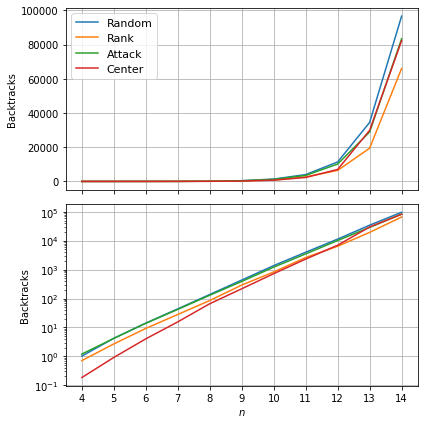

In [4]:
## Create subplots
figure, axes = plt.subplots(2, 1, figsize=(6,6), sharex=True, tight_layout=True)

## For all approaches
columns = ["bt_random", "bt_rank", "bt_attack", "bt_center"]

## Total number of backtracks for each n
data_by_N.plot(x="N", y=columns, grid=True, label=["random", "rank", "attack", "center"], kind="line", ax=axes[0], 
               color=[color_dict.get(x, '#333333') for x in columns])

## Same, but log scaled
data_by_N.plot(x="N", y=columns, grid=True, kind="line", ax=axes[1], logy=True, legend=False,
               color=[color_dict.get(x, '#333333') for x in columns])

axes[0].legend(loc=2, prop={'size': 11}, labels=["Random", "Rank", "Attack", "Center"])
axes[0].set_ylabel("Backtracks")
axes[1].set_ylabel("Backtracks")
plt.xticks(data_by_N["N"])
plt.xlabel('$\it{n}$')
plt.savefig('figures\\totalbacktracks.pdf')
plt.show()

In [5]:
## Add columns with normalized number of backtracks compared to random
def normalize(df, col, by):
    df[col] = df[col] / df[by]
    
for col in ['bt_rank', 'bt_attack', 'bt_center', 'bt_random']:
    normalize(data_by_N, col, 'bt_random')
    
data_by_N.set_index('N')
data_by_N

,N,bt_random,bt_rank,bt_attack,bt_center
0,4,1.0,0.699211,1.178501,0.181460
1,5,1.0,0.638075,0.992376,0.217060
2,6,1.0,0.654245,0.982964,0.284852
3,7,1.0,0.640079,0.959477,0.355571
4,8,1.0,0.618117,0.942741,0.479508
5,9,1.0,0.670032,0.893941,0.498988
6,10,1.0,0.602466,0.883123,0.526195
7,11,1.0,0.655747,0.875723,0.580629
8,12,1.0,0.566131,0.893734,0.615034
9,13,1.0,0.563575,0.838270,0.865922


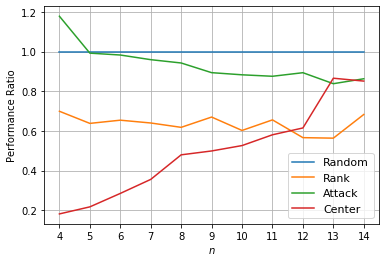

In [6]:
## Plot normalized backtrack counts for each n
columns = ["bt_random", "bt_rank", "bt_attack", "bt_center"]
data_by_N.plot(x="N", y=columns, 
               label=["random", "rank", "attack", "center"],
               kind="line", figsize=(6,4), grid=True, color=[color_dict.get(x, '#333333') for x in columns])

plt.xticks(data_by_N["N"])
plt.legend(loc=4, prop={'size': 11}, labels=["Random", "Rank", "Attack", "Center"])
plt.xlabel('$\it{n}$')
plt.ylabel("Performance Ratio")
plt.savefig('figures\\lines.pdf')
plt.show()

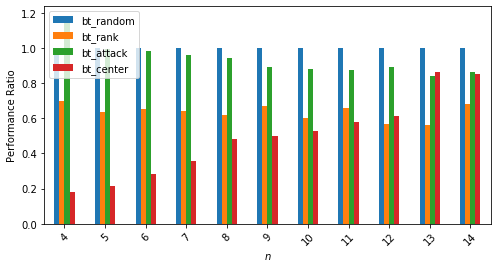

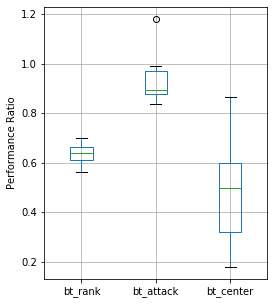

In [7]:
## Plots with the same information visualized differently
## Not used in final version of thesis

columns = ["bt_random", "bt_rank", "bt_attack", "bt_center"]

## Bar chart
data_by_N.plot(x="N", y=columns,
               label=columns, kind="bar", figsize=(8,4), color=[color_dict.get(x, '#333333') for x in columns])

plt.xticks(rotation=45)
plt.xlabel('$\it{n}$')
plt.ylabel("Performance Ratio")
plt.show()

## Box plot
data_by_N.boxplot(column=['bt_rank', 'bt_attack', 'bt_center'],
                  labels=['a', 'b', 'c'], figsize=(4,5))

plt.ylabel("Performance Ratio")
plt.show()

### Comparing on the piece type distribution

In [8]:
## Load data
data = pd.read_csv('alldata.csv')

## Calculate skewness coefficient and add as column to dataframe
skew = np.zeros((len(data['rankdist'])))
for i, ranking in enumerate(data['rankdist']):
    rankings = [float(a) for a in str(ranking)]
    skew[i] = stats.skew(rankings)
data['skew'] = skew

In [9]:
## Group by degree of skewness
data['skew_bin'] = pd.cut(data['skew'],[-float("inf"), -0.499, 0.5, float("inf")])
data.groupby(['skew_bin']).size().reset_index(name='counts')

,skew_bin,counts
0,"(-inf, -0.499]",1187
1,"(-0.499, 0.5]",6384
2,"(0.5, inf]",3429


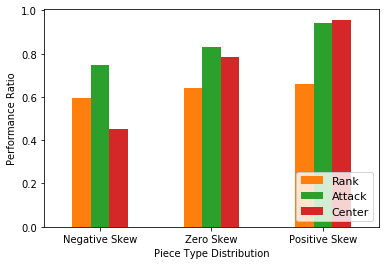

In [10]:
data = data.groupby(['skew_bin'], as_index=False).mean()

## Add columns with normalized number of backtracks compared to random
for col in ['bt_rank', 'bt_attack', 'bt_center', 'bt_random']:
    normalize(data, col, 'bt_random')

columns = ["bt_rank", "bt_attack", "bt_center"]

## Bar chart
ax = data.plot(x='skew_bin', y=columns, 
               label=["rank", "attack", "center"],
               kind="bar", figsize=(6,4), 
               color=[color_dict.get(x, '#333333') for x in columns])

ax.set_xticklabels(["Negative Skew","Zero Skew","Positive Skew"], rotation=0)
ax.set_xlabel("Piece Type Distribution")
ax.set_ylabel("Performance Ratio")
plt.legend(loc=4, prop={'size': 11}, labels=["Rank", "Attack", "Center"])
plt.savefig('figures\\skew.pdf')
plt.show()